In [1]:
import numpy as np
import pandas as pd
import time
from scipy.stats import linregress
from datetime import datetime
import time
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import datetime

In [2]:
crude = "Weekly_U.S._Ending_Stocks_excluding_SPR_of_Crude_Oil (2).AUG14.csv"
gasoline = "Weekly_U.S._Ending_Stocks_of_Total_Gasoline (2).Aug14.csv"
WTI='West_Texas_Intermediate_Crude_Oil_Spot_Price (3)Aug14.csv'
# https://www.eia.gov/outlooks/steo/data/browser/#/?v=8&f=M&s=&start=199701&end=202112&linechart=WTIPUUS&ctype=linechart&maptype=0&id=

In [3]:
start_date = "2019-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

In [4]:
#read in csv, remove and rename headers for crude storage
crude_df =pd.read_csv(crude, header=[1,2,3,4])
crude_df.columns = crude_df.columns.droplevel(0)
crude_df.columns = crude_df.columns.droplevel(0)
crude_df.columns = crude_df.columns.droplevel(0)
crude_df.rename(columns={'Weekly U.S. Ending Stocks excluding SPR of Crude Oil Thousand Barrels':'Crude'}, inplace=True)
crude_df.rename(columns={'Week of':'Date'}, inplace=True)
crude_df['Date'] = pd.to_datetime(crude_df['Date'], errors='coerce')
#read in csv, remove and rename headers for gasoline storage
gasoline_df =pd.read_csv(gasoline, header=[1,2,3,4])
gasoline_df.columns = gasoline_df.columns.droplevel(0)
gasoline_df.columns = gasoline_df.columns.droplevel(0)
gasoline_df.columns = gasoline_df.columns.droplevel(0)
gasoline_df.rename(columns={'Week of':'Date'}, inplace=True)
gasoline_df.rename(columns={'Weekly U.S. Ending Stocks of Total Gasoline Thousand Barrels':'Gasoline Storage'}, inplace=True)
gasoline_df['Date'] = pd.to_datetime(gasoline_df['Date'], errors='coerce')
#read in csv, remove and rename headers for crude prices
WTI_df =pd.read_csv(WTI, header=[1,2,3,4])
WTI_df.columns = WTI_df.columns.droplevel(0)
WTI_df.columns = WTI_df.columns.droplevel(0)
WTI_df.columns = WTI_df.columns.droplevel(0)
WTI_df.rename(columns={'Month':'Date'}, inplace=True)
WTI_df.rename(columns={'West Texas Intermediate Crude Oil Spot Price dollars per barrel':'Crude Price'}, inplace=True)
WTI_df['Date'] = pd.to_datetime(WTI_df['Date'], format='%b-%y')
WTI_df.rename(columns={'Series ID: STEO.WTIPUUS.M dollars per barrel':'Crude Price'}, inplace=True)
#change start and end dates for the dataframes
crude_date_df = crude_df[(crude_df['Date']> start_date) & (crude_df['Date']< end_date)]
gasoline_date_df = gasoline_df[(gasoline_df['Date']> start_date) & (gasoline_df['Date']< end_date)]
WTI_date_df = WTI_df[(WTI_df['Date']> start_date) & (WTI_df['Date']< end_date)]

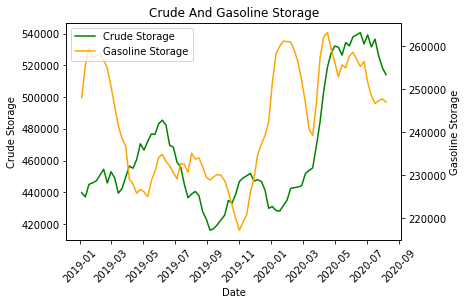

In [5]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_df['Date'],crude_date_df['Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude And Gasoline Storage")
ax1.grid(False)

ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage')
ax2.plot(gasoline_date_df['Date'], gasoline_date_df['Gasoline Storage'], color='orange')
ax2.tick_params(axis='y')

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
plt.legend(handles=[green_line, orange_line], loc='upper left')

plt.savefig("Crude And Gasoline Storage.png", bbox_inches='tight')

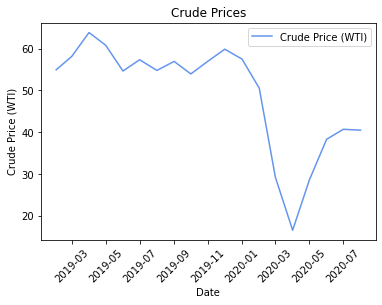

In [6]:
# plot just crude prices on one graph
fig, ax1=plt.subplots(frameon=False)

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Price (WTI)')
ax1.plot(WTI_date_df['Date'],WTI_date_df['Crude Price'], color='CornflowerBlue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Prices")

# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[blue_line])
plt.savefig("Crude Prices.png", bbox_inches='tight')

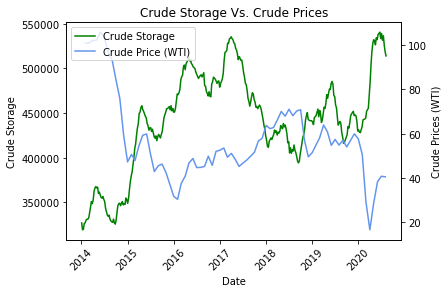

In [7]:
# plot showing crude stocks on prices
# this is for long term outlook
start_date_crude = "2014-01-01"
end_date_crude =  datetime.datetime.now()
crude_date_storage_df = crude_df[(crude_df['Date']> start_date_crude) & (crude_df['Date']< end_date_crude)]
WTI_date_storage_df = WTI_df[(WTI_df['Date']> start_date_crude) & (WTI_df['Date']< end_date_crude)]
# plot just crude prices on one graph
fig, ax1=plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_storage_df['Date'],crude_date_storage_df['Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Storage Vs. Crude Prices")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Crude Price'], color='CornflowerBlue')
ax2.tick_params(axis='y')


# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[green_line,blue_line],loc='upper left')
plt.savefig("Crude Storage Vs. Crude Prices.png", bbox_inches='tight')

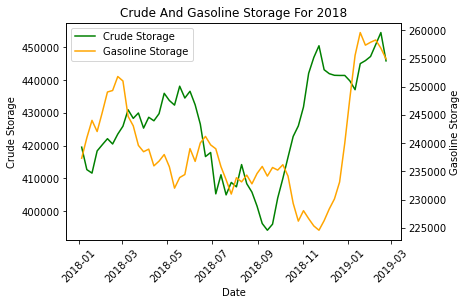

In [8]:
#This is an example to show what a normal year of production and consumption
start_date_normal= "2018-01-01"
end_date_normal =  "2019-03-01"

crude_date_normal_df = crude_df[(crude_df['Date']> start_date_normal) & (crude_df['Date']< end_date_normal)]
gasoline_date_normal_df = gasoline_df[(gasoline_df['Date']> start_date_normal) & (gasoline_df['Date']< end_date_normal)]
WTI_date_normal_df = WTI_df[(WTI_df['Date']> start_date_normal) & (WTI_df['Date']< end_date_normal)]

# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_normal_df['Date'],crude_date_normal_df['Crude'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude And Gasoline Storage For 2018")

ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage')
ax2.plot(gasoline_date_normal_df['Date'], gasoline_date_normal_df['Gasoline Storage'], color='orange')
ax2.tick_params(axis='y')

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
plt.legend(handles=[green_line, orange_line])
plt.savefig("Crude And Gasoline Storage For 2018.png", bbox_inches='tight')

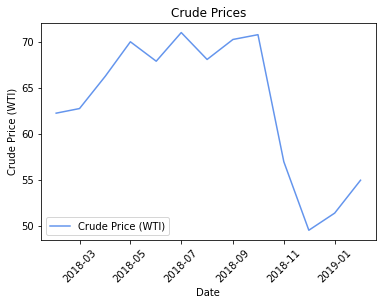

In [9]:
# normal year
# plot just crude prices on one graph
fig, ax1=plt.subplots(frameon=False)

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Price (WTI)')
ax1.plot(WTI_date_normal_df['Date'],WTI_date_normal_df['Crude Price'], color='CornflowerBlue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Prices")

# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[blue_line])
plt.savefig("Crude Prices.png", bbox_inches='tight')

In [10]:
crude_df.describe()

,Crude
count,1976.000000
mean,334126.180668
std,58629.237788
min,247323.000000
25%,301721.500000
50%,319141.500000
75%,338410.750000
max,540722.000000


In [11]:
gasoline_df.describe()

,Gasoline Storage
count,1597.000000
mean,215238.471509
std,14888.866899
min,178739.000000
25%,204522.000000
50%,213478.000000
75%,223884.000000
max,263234.000000


In [12]:
WTI_df.describe()

,Crude Price
count,301.00000
mean,54.84485
std,27.70708
min,11.35000
25%,30.34000
50%,49.83000
75%,74.41000
max,133.88000


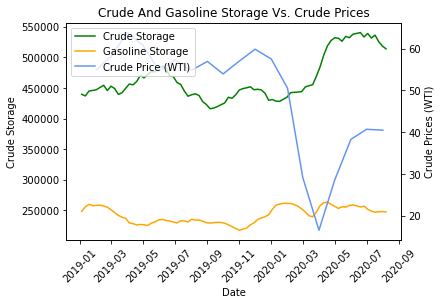

In [13]:
# plot crude storage, gasoline storage, and crude prices on one graph with two axes
#having all three lines on one graph can be confusing
fig, ax1=plt.subplots(frameon=False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage')
ax1.plot(crude_date_df['Date'],crude_date_df['Crude'], color='g')
ax1.plot(gasoline_date_df['Date'], gasoline_date_df['Gasoline Storage'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.tick_params(axis='y')
_=plt.xticks(rotation=45)
ax1.set_title("Crude And Gasoline Storage Vs. Crude Prices")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_df['Date'], WTI_date_df['Crude Price'], color='CornflowerBlue')
ax2.tick_params(axis='y')

# defining legend style and data
green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[green_line, orange_line, blue_line], loc='upper left')
plt.savefig("Crude And Gasoline Storage Vs. Crude Prices.png", bbox_inches='tight')